<a href="https://colab.research.google.com/github/priyakter/Project/blob/main/confusion_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, RocCurveDisplay


In [77]:
cancer_data=pd.read_csv('/content/drive/MyDrive/data_sets.csv')

In [78]:
print(cancer_data.shape)

(1000, 26)


In [79]:
print(cancer_data.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [98]:
print(cancer_data.head(10))

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   
5      5       P102   35       1              4            5             6   
6      6       P103   52       2              2            4             5   
7      7       P104   28       2              3            1             4   
8      8       P105   35       2              4            5             6   
9      9       P106   46       1              2            3             4   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...

In [101]:
cancer_data=cancer_data.drop(['index','Patient Id'], axis = 1)

In [102]:
cancer_data['Level'] = cancer_data['Level'].replace({'Low': 0, 'Medium': 1, 'High': 1})


In [103]:
target=cancer_data['Level']
print(pd.value_counts(target))

Level
1    697
0    303
Name: count, dtype: int64


<ipython-input-103-06d8eb328221>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(target))


In [104]:
print(cancer_data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [105]:
seed=7
train_data,test_data=train_test_split(cancer_data,test_size=0.30,random_state=7,stratify=target)
print('\n Training Data:',train_data.shape)
print('\n Testing Data:',test_data.shape)


 Training Data: (700, 24)

 Testing Data: (300, 24)


In [106]:
print(pd.value_counts(train_data['Level']))
print(pd.value_counts(test_data['Level']))

Level
1    488
0    212
Name: count, dtype: int64
Level
1    209
0     91
Name: count, dtype: int64


<ipython-input-106-1679ec0f63b1>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_data['Level']))
<ipython-input-106-1679ec0f63b1>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(test_data['Level']))


In [108]:
train_x=train_data.drop('Level',axis=1)
train_y=train_data['Level']
test_x=test_data.drop('Level',axis=1)
test_y=test_data['Level']


In [140]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=['linear','poly','rbf']
Train_acc=[]
test_acc=[]
predict=[]
for i in model:
  model_SVM=SVC(kernel=i,C=1,gamma='scale').fit(train_x,train_y)
  prediction_data1=model_SVM.predict(train_x)
  prediction_data2=model_SVM.predict(test_x)
  predict.append(prediction_data2)
  Train_acc.append(accuracy_score(train_y,prediction_data1))
  test_acc.append(accuracy_score(test_y,prediction_data2))

from tabulate import tabulate
result=[]
for i in range(len(model)):
    result.append([model[i],Train_acc[i],test_acc[i]])

df=pd.DataFrame(result,columns=['Model','Training Accuracy','Testing Accuracy'])
print(df)




    Model  Training Accuracy  Testing Accuracy
0  linear           1.000000          1.000000
1    poly           0.958571          0.936667
2     rbf           0.977143          0.986667


In [149]:
for i in range(len(model)):
  print(model[i])
  tp, fp, fn, tn = confusion_matrix(test_y,predict[i]).ravel()
  print('tp fp fn tn')
  print(tp, fp, fn, tn)
  print('\n')
  accuracy = (tp+tn)/(tp+fp+fn+tn)
  print('Accuracy:', accuracy)
  precision = tp/(tp+fp)
  print('Precision:', precision)
  recall = tp/(tp+fn)
  print('Recall:', recall)
  f1 = 2*(precision*recall)/(precision+recall)
  print('F1 Score:', f1)
  print('\n')



linear
tp fp fn tn
91 0 0 209


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


poly
tp fp fn tn
88 3 16 193


Accuracy: 0.9366666666666666
Precision: 0.967032967032967
Recall: 0.8461538461538461
F1 Score: 0.9025641025641026


rbf
tp fp fn tn
87 4 0 209


Accuracy: 0.9866666666666667
Precision: 0.9560439560439561
Recall: 1.0
F1 Score: 0.9775280898876404




linear


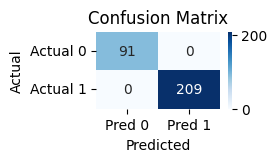

poly


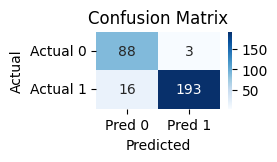

rbf


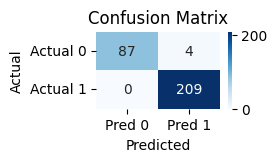

In [145]:
for i in range(len(model)):
  print(model[i])
  cm = confusion_matrix(test_y, predict[i])
  plt.figure(figsize=(2, 1))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()
